In [1]:
%help

The following SysML v2 magic commands are available.
For help on a specific command, use "%help <COMMAND>" or "%<cmd> -h".

%eval		Evaluate a given expression.
%export		Save a file of the JSON representation of the abstract syntax tree rooted in the named element.
%help		Get a list of available commands or help on a specific command
%list		List loaded library packages or the results of a given query
%show		Print the abstract syntax tree rooted in a named element
%publish	Publish to the repository the modele elements rooted in a named element
%view		Render the view specified by the named view usage
%viz		Visualize the name model elements


In [2]:
%eval -h

Usage: %eval [--target=<NAME>] <EXPR>

Print the results of evaluating <EXPR> on the target given by <NAME>, which must be fully qualified.
If a target is not given, then evaluate <EXPR> in global scope.


In [3]:
%viz -h

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN

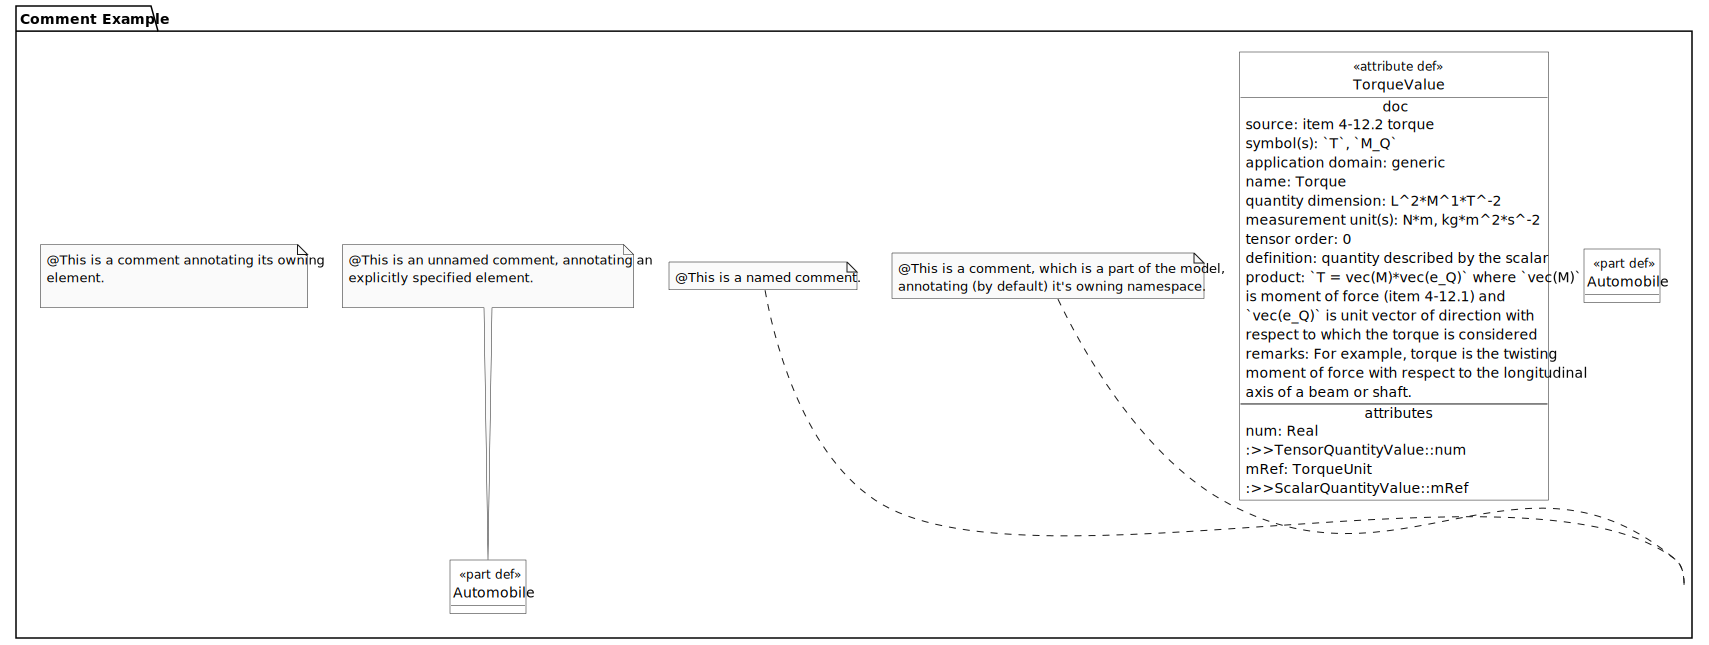

In [4]:
%viz "Comment Example"

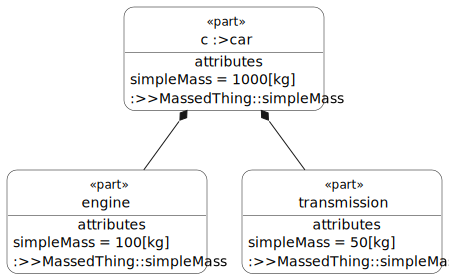

In [5]:
%viz --view=default --style=default "Car Mass Rollup Example 1::c"

In [6]:
package MassRollup1 {
	private import NumericalFunctions::*;
	
	part def MassedThing {
		attribute simpleMass :> ISQ::mass; 
		attribute totalMass :> ISQ::mass;
	}
	
	part simpleThing : MassedThing {
		attribute :>> totalMass = simpleMass;
	}
	
	part compositeThing : MassedThing {
		part subcomponents: MassedThing[*];		
		attribute :>> totalMass =
			simpleMass + sum(subcomponents.totalMass); 
	}
	
}

Package MassRollup1 (62e35ec7-ee63-446c-9522-853aaf367cf6)


In [7]:

	private import ScalarValues::*;
	private import MassRollup1::*;
	
	part def CarPart :> MassedThing {			
		attribute serialNumber: String;
	}
	
	part car: CarPart :> compositeThing {	
		attribute vin :>> serialNumber;
		
		part carParts: CarPart[*] :>> subcomponents;
		
		part engine :> simpleThing, carParts {
			//...
		}
		
		part transmission :> simpleThing, carParts {
			//...
		}
	}

	// Example usage
	
	private import SI::kg;
	part c :> car {
		attribute :>> simpleMass = 1000[kg];
		part :>> engine {
			attribute :>> simpleMass = 100[kg];
		}
		
		part redefines transmission {
			attribute :>> simpleMass = 50[kg];
		}	
	}
	
	// c::totalMass --> 1150.0[kg]


PartDefinition CarPart (21c0d711-893d-4634-bcd9-10f2025348e3)
PartUsage car (c14b814d-142e-49f6-999a-c14c10491815)
PartUsage c (a4f124d4-6ea5-4861-a342-595d3b43086f)


In [125]:
%eval c::totalMass

ERROR:Must be an accessible feature (use dot notation for nesting) (123.sysml line : 2 column : 1)


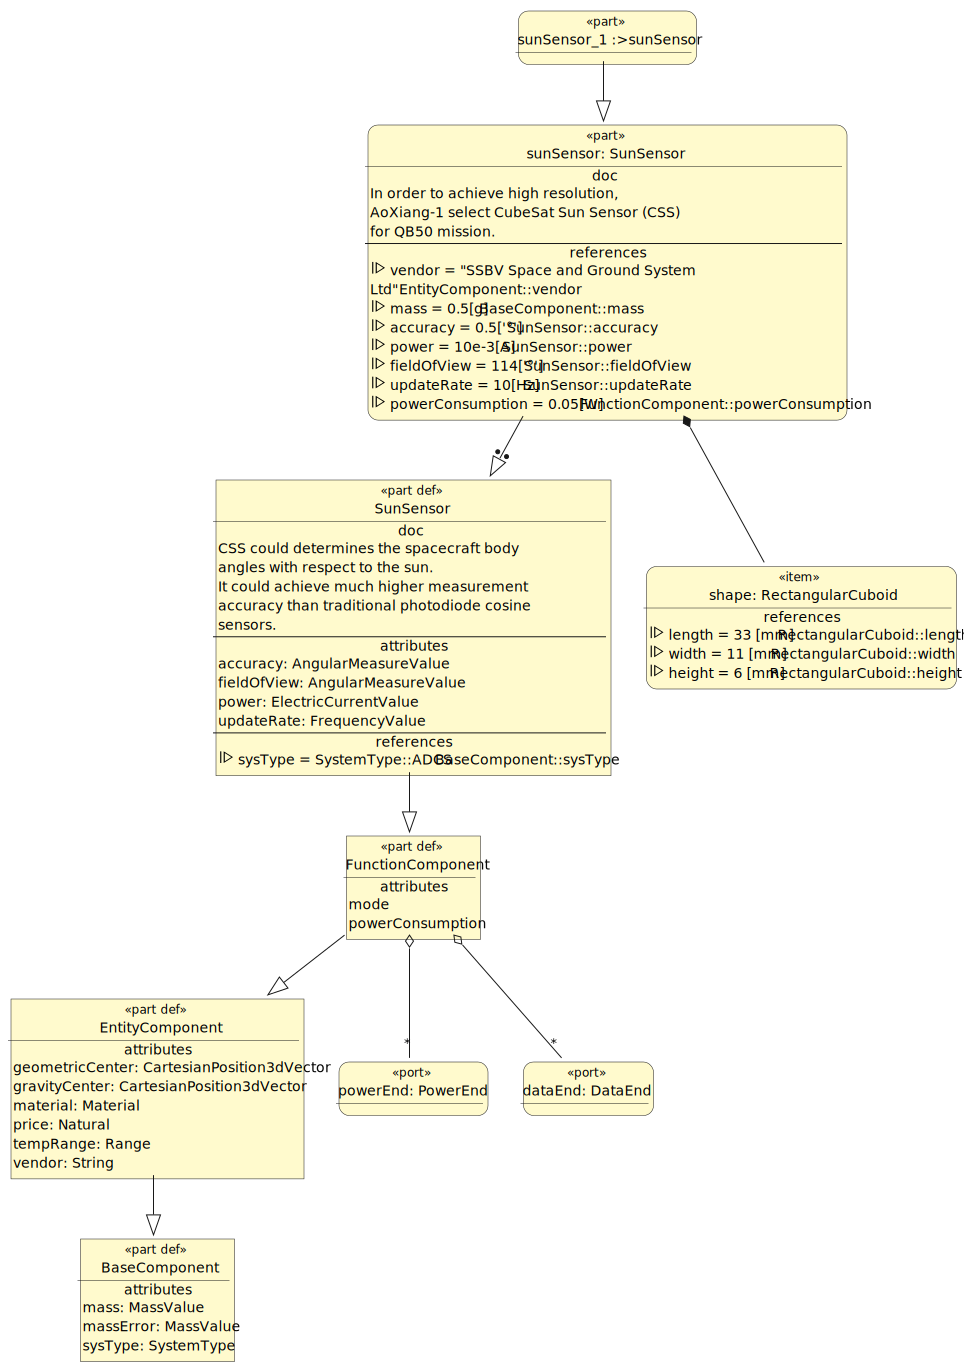

In [23]:
%viz --style=STDCOLOR CubeSat_Base::BaseComponent CubeSat_Base::EntityComponent CubeSat_Base::FunctionComponent ADCS::SunSensor Aoxiang1::sunSensor Aoxiang1::sunSensor_1

In [95]:
private import CubeSat_Base::*;
private import Time::Iso8601DateTimeStructure;
part def CubeSatSystem :> FunctionComponent{
        attribute track : Track;
        

    }
    part def QB50_SYS :> CubeSatSystem;
    
    attribute def Track{
        attribute SatelliteCatalogNumber : Integer;
        attribute Classification : ClassificationType;
        attribute InternationalDesignator : String;
    }

    attribute def EarthOrbit2 :> Track{
        attribute Epoch : Iso8601DateTimeStructure;
        attribute ndot : Real;
        attribute ndotdot : Real;
        attribute bSTAR : Real;
        attribute ephemerisType : Integer;
        attribute elementSetNumber : String;
        attribute checksum : Integer;
        attribute inclination : ISQ::AngularMeasureValue;
        attribute raan : ISQ::AngularMeasureValue;
        attribute eccentricity : Real;
        attribute argumentofPerigee : ISQ::AngularMeasureValue;
        attribute meanAnomaly : ISQ::AngularMeasureValue;
        attribute meanMotion : Positive;
    }

    attribute ASRTU1 : EarthOrbit2{
        :> SatelliteCatalogNumber = 99130;
        // :> Classification = Unclassified;
        :> InternationalDesignator = "24099A";
        // :> Epoch {
        //     :> year = 2024;
        //     :> month = 11;
        //     :> day = 9;
        //     :> hour = 1;
        //     :> minute = 10;
        //     :> second = 14;
        //     :> microsecond = 533;
        // }
        attribute epoch ::> ASRTU1_Epoch;
        part :> ndot = -0.00328134;
        part :> ndotdot = 0;
        part :> bSTAR = -0.00328134;
        part :> ephemerisType = 0;  
        :> elementSetNumber = "0000";
        :> checksum = 9;
        :> inclination = 97['°'];
        :> raan = 181.2765['°'];
        :> eccentricity = 0.001672;
        :> argumentofPerigee = 216.0612['°'];
        :> meanAnomaly = 302.6737['°'];
        :> meanMotion = 15.22998775000015;
    }

    attribute ASRTU1_Epoch : Iso8601DateTimeStructure{
        :> year = 2024;
        :> month = 11;
        :> day = 9;
        :> hour = 1;
        :> minute = 10;
        :> second = 14;
        :> microsecond = 533;
    } 


ERROR:A part must be typed by item definitions. (95.sysml line : 46 column : 9)
ERROR:A part must be typed by item definitions. (95.sysml line : 47 column : 9)
ERROR:A part must be typed by item definitions. (95.sysml line : 48 column : 9)
ERROR:A part must be typed by item definitions. (95.sysml line : 49 column : 9)


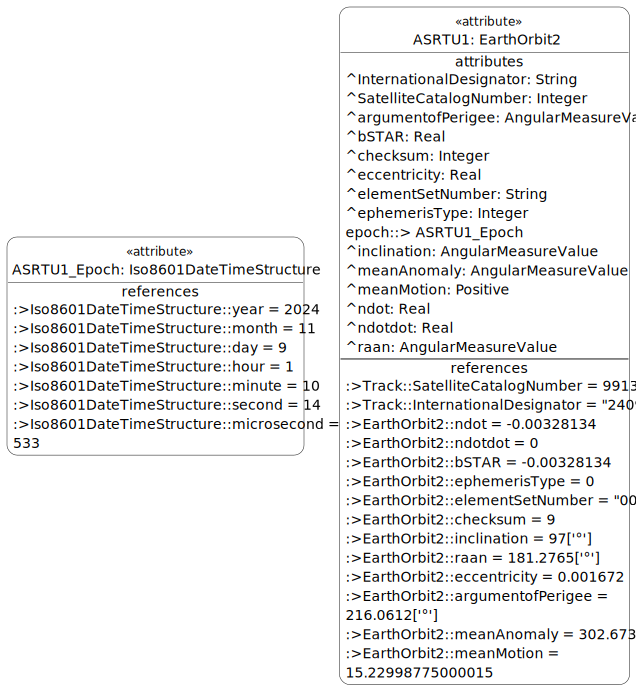

In [96]:
%viz --view=tree ASRTU1_Epoch ASRTU1

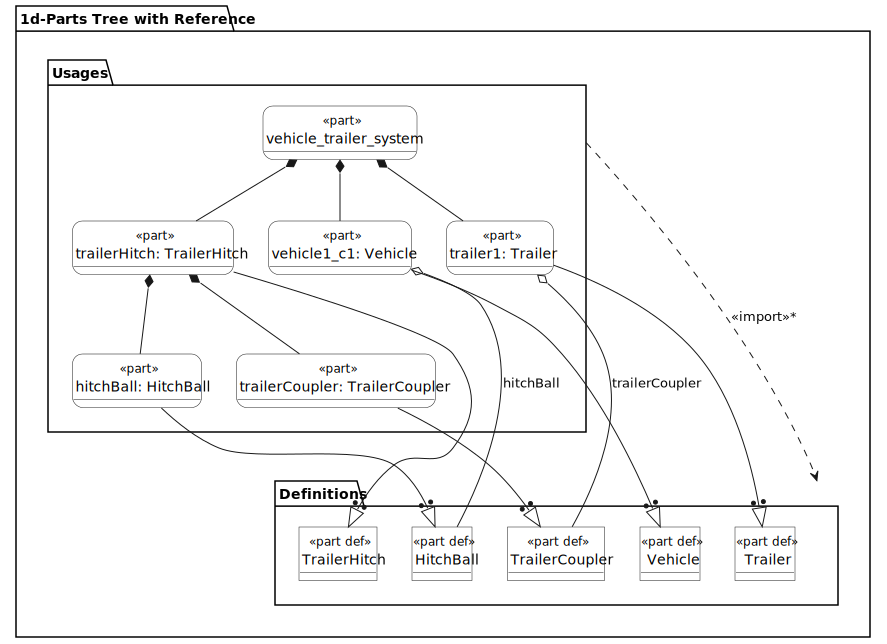

In [1]:
%viz "1d-Parts Tree with Reference"

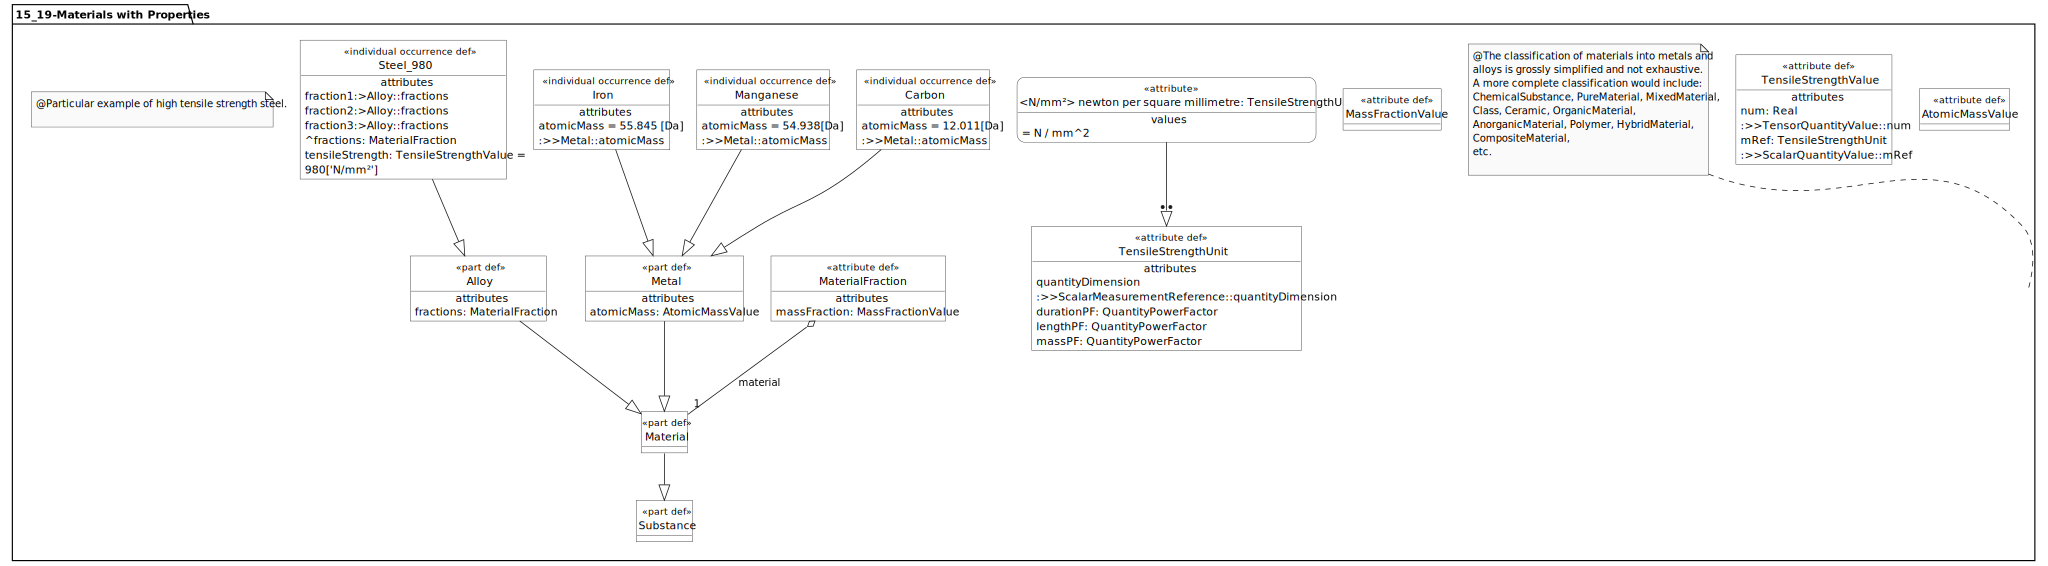

In [22]:
%viz --view=default  "15_19-Materials with Properties"

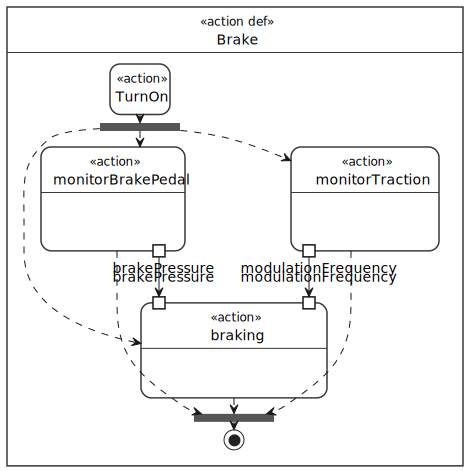

In [37]:
%viz --view=action --style=TB  "Fork Join Example::Brake"

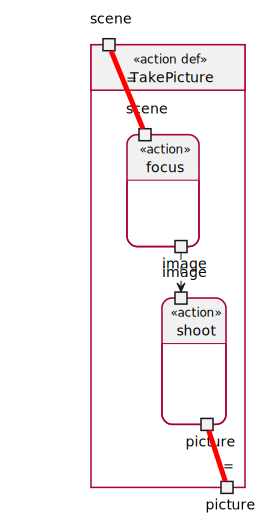

In [42]:
%viz --view=action --style=PLANTUML --style=POLYLINE   "Action Definition Example::TakePicture"

In [40]:
%

PartUsage CubeSat System Modeling (b2f00703-bc60-4c4b-ac28-4ed47e4792e3)
